In [1]:
import boto3
import pandas as pd
from sagemaker import get_execution_role

In [3]:
role = get_execution_role()
bucket='ds6-yelp-reviews'
data_key = 'photo.json'
data_location = 's3://{}/{}'.format(bucket, data_key)

df = pd.read_json(data_location, lines=True)

In [4]:
print(df.shape)
df.head()

(200000, 4)


,business_id,caption,label,photo_id
0,rcaPajgKOJC2vo_l3xa42A,,inside,MllA1nNpcp1kDteVg6OGUw
1,Kn23LDd740SBVJ7mum0fwg,,inside,YjxBE88Bf6CmTEF2LP1UNA
2,ZkGDCVKSdf8m76cnnalL-A,,food,1f7izSjM0WjkDRIVbPy1yw
3,bF8gv7k_rwZtiDLP2ZB04w,,inside,NcSlcDTEEeOaixotOPk-rA
4,50Anorn0DJXFhBr9a9_gHQ,,inside,5IiIo5UKEW0lWqZ6sWrY_A


In [11]:
def cap_length(text):
    return len(text)

In [12]:
df['len_caption'] = df['caption'].apply(lambda x: cap_length(x))

In [13]:
df['len_caption'].describe()

count    200000.000000
mean         15.506795
std          25.595195
min           0.000000
25%           0.000000
50%           0.000000
75%          22.000000
max         140.000000
Name: len_caption, dtype: float64

In [15]:
import seaborn as sns

In [16]:
with_caption = df[df['len_caption'] > 0]

/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


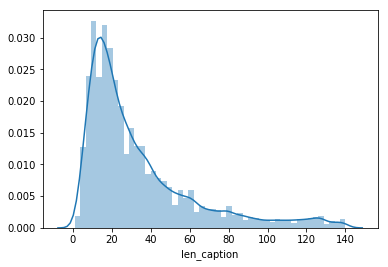

In [19]:
sns.distplot(with_caption['len_caption'])

In [21]:
import pandas_profiling

In [24]:
from pandas_profiling import ProfileReport

In [25]:
ProfileReport(df)

/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))
/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))
/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))
/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


Number of variables,5
Number of observations,200000
Total Missing (%),0.0%
Total size in memory,7.6 MiB
Average record size in memory,40.0 B
Numeric,1
Categorical,3
Boolean,0
Date,0
Text (Unique),1
Rejected,0
